**Grupo 03**

**Entrega 02 - Projeto**

Erik de Souza Bueno - 818113513

Guilherme Yoshikawa da Silva - 818133945

Luccas Samuel Martins Magalhães - 818141713

Matheus Novais Chiappa - 818234016


In [38]:
# Instalando as bibliotecas necessárias
import pandas as pd
import numpy as np
from sklearn import tree # A árvore de decisão vem da bibliteca sklearn
import graphviz # utilizado para a criação do modelo visual da árvore 
from sklearn.model_selection import cross_val_score

In [39]:
# Importando a base de dados do projeto 
from google.colab import files
uploaded = files.upload()
df = pd.read_excel ('census.xlsx') 


Saving census.xlsx to census.xlsx


In [40]:
df.head()
len(df)

30162

In [41]:
df = df[(df.astype(str) != ' ?').all(axis=1)]
len(df)

30162

In [42]:
# Mostrando informaçoes sobre a base de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 30161
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      30162 non-null  int64 
 1   age             30162 non-null  int64 
 2   workclass       30162 non-null  object
 3   final.weight    30162 non-null  int64 
 4   education       30162 non-null  object
 5   education.num   30162 non-null  int64 
 6   marital.status  30162 non-null  object
 7   occupation      30162 non-null  object
 8   relationship    30162 non-null  object
 9   race            30162 non-null  object
 10  sex             30162 non-null  object
 11  capital.gain    30162 non-null  int64 
 12  capital.loos    30162 non-null  int64 
 13  hour.per.week   30162 non-null  int64 
 14  native.country  30162 non-null  object
 15  income          30162 non-null  object
dtypes: int64(7), object(9)
memory usage: 3.9+ MB


In [43]:
# Criando uma nova coluna, mudando a coluna income para binária para melhor visualização

# Transformando a coluna "income" para binário
# df['income_bi'] = df.apply(lambda row: 1 if '>50K'in row['income'] else 0, axis=1) 

# Transformando a coluna "age" para binário
df['age_jovem'] = df.apply(lambda row: 1 if '18' in str(row ['age']) else 0, axis=1)


In [44]:
df.head(30)

,Unnamed: 0,age,workclass,final.weight,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loos,hour.per.week,native.country,income,age_jovem
0,1,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0
1,2,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0
2,3,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
3,4,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0
4,5,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0
5,6,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,0
6,7,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K,0
7,8,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K,0
8,9,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K,0
9,10,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K,0


In [45]:
# Removendo algumas colunas que não contribuiram nesse caso
df = df.drop(['income','final.weight','education.num','capital.gain','capital.loos','hour.per.week','native.country'], axis=1)
# Mostrar como ficou após o drop
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 30161
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      30162 non-null  int64 
 1   age             30162 non-null  int64 
 2   workclass       30162 non-null  object
 3   education       30162 non-null  object
 4   marital.status  30162 non-null  object
 5   occupation      30162 non-null  object
 6   relationship    30162 non-null  object
 7   race            30162 non-null  object
 8   sex             30162 non-null  object
 9   age_jovem       30162 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 2.5+ MB


In [46]:
# Transferindo os dados com valor categorico para valores binários
df = pd.get_dummies(df, columns=['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex'])

In [ ]:
# Para mostrar os resultados até agora, foi mostrado as primeiras 30 linhas do dataset
df.head(30)

,Unnamed: 0,income_bi,age_17,age_18,age_19,age_20,age_21,age_22,age_23,age_24,age_25,age_26,age_27,age_28,age_29,age_30,age_31,age_32,age_33,age_34,age_35,age_36,age_37,age_38,age_39,age_40,age_41,age_42,age_43,age_44,age_45,age_46,age_47,age_48,age_49,age_50,age_51,age_52,age_53,age_54,...,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,marital.status_ Divorced,marital.status_ Married-AF-spouse,marital.status_ Married-civ-spouse,marital.status_ Married-spouse-absent,marital.status_ Never-married,marital.status_ Separated,marital.status_ Widowed,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1
1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1
2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
4,5,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0
5,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0
6,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0
7,8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1
8,9,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0
9,10,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1


In [ ]:
# Com um pouco mais de 30 mil filas, foi dividido o training set e o test set por 80/20

# Realizando o embaralhamento das filas
df = df.sample(frac=1)

In [ ]:
# Dividindo os dados de training set e o test set
d_train = df[:25000] # training set
d_test = df[25000:] # test set

d_train_att = d_train.drop(['income_bi'], axis=1)
d_train_gt50 = d_train['income_bi']

d_test_att = d_test.drop(['income_bi'], axis=1)
d_test_gt50 = d_test['income_bi']

d_att = df.drop(['income_bi'], axis=1)
d_gt50 = df['income_bi']

In [ ]:
# Printando a quantidade de dados de quem tem o rendimento maior que 50k, comparando com o total
print("Rendimento maior ou igual a 50k por ano: %d de %d (%.2f%%)" % (np.sum(d_gt50), len(d_gt50), 100*float(np.sum(d_gt50)) / len(d_gt50)))

Rendimento maior ou igual a 50k por ano: 7508 de 30162 (24.89%)


In [ ]:
# Classificando a árvore de decisão
t = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)
t = t.fit(d_train_att, d_train_gt50)

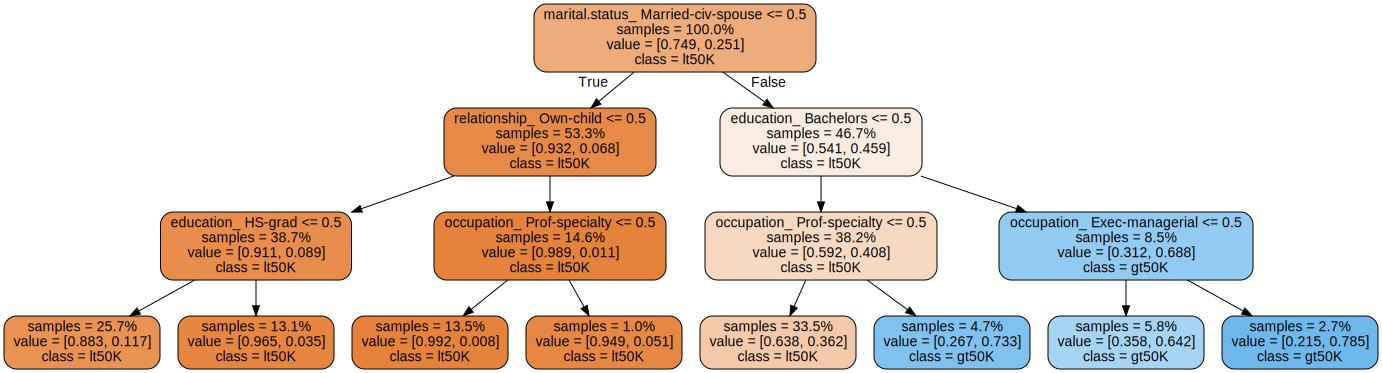

In [ ]:
# Visualização da árvore de decisão com a base de dados do projeto, usando o graphviz tool
dot_data = tree.export_graphviz(t, out_file=None, label='all', impurity=False, proportion=True, 
                               feature_names=list(d_train_att), class_names=['lt50K', 'gt50K'],
                               filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph

In [ ]:
t.score(d_test_att, d_test_gt50)
# O resultado do modelo mostra um resultado de 82%, o que é um bom resultado

0.8033707865168539

In [ ]:
scores = cross_val_score(t, d_att, d_gt50, cv=5)
# Mostra a pontuação média e +/- dois desvios padrão de distância (cobrindo 95% ou pontuação)
print('Accuracy: %0.2f (+/- %0.2f)' % (scores.mean(), scores.std()*2))
# Com uma precisão de 0.83 (+/- 0.00)

Accuracy: 0.80 (+/- 0.01)


In [ ]:
# Preparando um modelo de previsão, guardando a primeira fila da moldura de dados depois de a termos modificado.
df.iloc[[0]].to_csv('prediction.csv', sep=',', encoding='utf-8', index=False)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 27903 to 14604
Data columns (total 60 columns):
 #   Column                                 Non-Null Count  Dtype
---  ------                                 --------------  -----
 0   Unnamed: 0                             30162 non-null  int64
 1   age                                    30162 non-null  int64
 2   income_bi                              30162 non-null  int64
 3   workclass_ Federal-gov                 30162 non-null  uint8
 4   workclass_ Local-gov                   30162 non-null  uint8
 5   workclass_ Private                     30162 non-null  uint8
 6   workclass_ Self-emp-inc                30162 non-null  uint8
 7   workclass_ Self-emp-not-inc            30162 non-null  uint8
 8   workclass_ State-gov                   30162 non-null  uint8
 9   workclass_ Without-pay                 30162 non-null  uint8
 10  education_ 10th                        30162 non-null  uint8
 11  education_ 11th         

In [ ]:
# O método certo é testar poucas profundidades a fim de encontrar a profundidade máxima certa para o modelo
for max_depth in range(1, 20):
    t = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    scores = cross_val_score(t, d_att, d_gt50, cv=5)
    print("Max depth: %d, Accuracy: %0.2f (+/- %0.2f)" % (max_depth, scores.mean(), scores.std()*2))

Max depth: 1, Accuracy: 0.75 (+/- 0.00)
Max depth: 2, Accuracy: 0.78 (+/- 0.00)
Max depth: 3, Accuracy: 0.80 (+/- 0.01)
Max depth: 4, Accuracy: 0.82 (+/- 0.01)
Max depth: 5, Accuracy: 0.82 (+/- 0.01)
Max depth: 6, Accuracy: 0.82 (+/- 0.01)
Max depth: 7, Accuracy: 0.82 (+/- 0.01)
Max depth: 8, Accuracy: 0.82 (+/- 0.01)
Max depth: 9, Accuracy: 0.82 (+/- 0.01)
Max depth: 10, Accuracy: 0.82 (+/- 0.01)
Max depth: 11, Accuracy: 0.82 (+/- 0.01)
Max depth: 12, Accuracy: 0.81 (+/- 0.00)
Max depth: 13, Accuracy: 0.81 (+/- 0.00)
Max depth: 14, Accuracy: 0.81 (+/- 0.00)
Max depth: 15, Accuracy: 0.81 (+/- 0.00)
Max depth: 16, Accuracy: 0.80 (+/- 0.01)
Max depth: 17, Accuracy: 0.80 (+/- 0.01)
Max depth: 18, Accuracy: 0.80 (+/- 0.01)
Max depth: 19, Accuracy: 0.79 (+/- 0.01)
